#### **EDA has been completed. File below analyzes most prolific twitterers and types of organizations.**

In [1]:
tweets_spark = spark.read.parquet('gs://' + 'msca-bdp-students-bucket' + '/shared_data/sanchit/tweets_parquet_original_col_filtered')


In [2]:
tweets_spark.columns
#confirmation

['created_at',
 'statuses_count',
 'retweeted',
 'text',
 'user_id',
 'username',
 'user_desc',
 'followers_count',
 'location',
 'verified_user']

In [3]:
tweets_spark.limit(5)

DataFrame[created_at: string, statuses_count: bigint, retweeted: string, text: string, user_id: bigint, username: string, user_desc: string, followers_count: bigint, location: string, verified_user: boolean]

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore')

#### **Identify the most prolific / influential Twitterers**


#### By message volume (original content)*

In [5]:
from pyspark.sql import functions as F


In [6]:
tweets_original = tweets_spark.filter(tweets_spark.retweeted != 'RT')
#filter out retweeted tweets by saying not equal to 'RT'
#retweeted column only has RT or na values

In [9]:
tweets_original.count()
#number of original tweets

1142234

In [7]:
tweets_original.groupby('username').agg(count('text')).sort(F.col("count(text)").desc()).limit(20).show(truncate=False)

+-------------------------------------------------+-----------+
|username                                         |count(text)|
+-------------------------------------------------+-----------+
|Kevin Edwards                                    |3115       |
|NJSchoolJobs.com                                 |3096       |
|Larry L. Robinson - Free - Education - University|2362       |
|Shopyaz Group                                    |2348       |
|KQ education group                               |1949       |
|Stigmabase | NORDIC                              |1822       |
|Pizzazz Book Promo                               |1768       |
|AJ Blackston - Financial IT Solutions Consultant |1755       |
|InHomeTutoringHonolulu.com                       |1326       |
|Designs By RAJA                                  |1297       |
|Agadir Group                                     |1177       |
|Get That Right                                   |1095       |
|DUO Inspirations                       

In [8]:
tweets_original_pandas = tweets_original.groupby('username','user_desc').agg(count('text')).sort(F.col("count(text)").desc()).limit(20).toPandas()

In [70]:
tweets_original_pandas

,username,user_desc,count(text)
0,Kevin Edwards,Special Education teacher who loves teaching and making fun memories in the classroom!\n\nCash App: $kpe0712,3115
1,NJSchoolJobs.com,The leading advertiser of education jobs for New Jersey's Schools since 1999! #nj #teaching #administrative #coaching #education #teachingjobs #newjersey,3096
2,Larry L. Robinson - Free - Education - University,Is a 17 course curriculum that teaches you how to find the right financial opportunities to fund your higher education https://tinyurl.com/y295tofh,2362
3,Shopyaz Group,"❤️Blogging❤️all the latest Top Products, Music, Art, collectibles, films and more.🎦💯",2348
4,KQ education group,THIS WEBSITE PROVIDE LATEST NEWS ON EDUCATION. Continue To help US FOR LATEST NEWS AND WE WILL PROVIDE BEST OF OUR EFFORTS TO MAKE YOU UPDATED,1949
5,Pizzazz Book Promo,Stay in touch! \n★FB https://goo.gl/WSoosO\n★PINTEREST https://goo.gl/PG6sGi\n★LINKEDIN https://goo.gl/cF9Pjh,1768
6,AJ Blackston - Financial IT Solutions Consultant,News: #Arbitration #Banking #CyberSecurity #Education \n#LegalIssues #ManagementConsulting #Medicine #PopCulture #USGovernment #USMilitary #WhiteCollarCrime,1753
7,InHomeTutoringHonolulu.com,https://t.co/qPjRcvZkes Affordable Private In Home Tutoring Honolulu Hawaii Covering all of Oahu and Remotely for The Entire U.S.A. Text or Call 808.224.1870,1326
8,Designs By RAJA,#Handmade #embroidered #homedecor #gifts & #unique items! Please visit us on #Etsy @ https://t.co/kKi9A0sYLG and on #Facebook @ https://t.co/FQAbaBOFky,1297
9,Agadir Group,"Welcome to AGADIR-GROUP, We depend on giving you the genuine report associated with development and amusement with a thought on 101% phenomenal news.",1177


#### By message retweet (how often their messages are being retweeted).  Please note: there are several variables that has “retweets count” in their name and you need to select correct one based on the EDA.*


In [8]:
tweets_retweet = tweets_spark.filter(tweets_spark.retweeted == 'RT')
#filter out retweeted tweets by saying equal to 'RT'
#retweeted column only has RT or na values

In [12]:
tweets_retweet.count()

2696399

In [9]:
tweets_retweet.groupby('username').agg(count('text')).sort(F.col("count(text)").desc()).limit(20).show(truncate=False)

+---------------------------------------+-----------+
|username                               |count(text)|
+---------------------------------------+-----------+
|Education World                        |5186       |
|Educationbnb                           |2763       |
|.                                      |1993       |
|James Clark                            |1840       |
|Richmond Miezah Annor (MPhil Chemistry)|690        |
|Michael                                |665        |
|Mike                                   |654        |
|John                                   |651        |
|Chris                                  |604        |
|Mark Johnson                           |600        |
|David                                  |595        |
|#DistanceLearning Bot                  |593        |
|FREE Add Your Ad Forum                 |579        |
|Alex                                   |562        |
|Sam                                    |533        |
|ً                          

In [10]:
tweets_retweet_pandas = tweets_retweet.groupby('username','user_desc').agg(count('text')).sort(F.col("count(text)").desc()).limit(20).toPandas()

In [83]:
tweets_retweet_pandas

,username,user_desc,count(text)
0,Education World,All education content. Education changes the life.\nSoftware Developer| ML | DS | Technical Blogging at http://techmorf.com |,1333
1,Educationbnb,By Doctor @KrittanawongMD. The leaderboard of #education3.0 lovers. Our mission: Establish education 3.0 Twitter community,723
2,James Clark,Data Quality Professional. Member of the @K12Prospects Data Quality team. Delivering the most accurate data of all schools and districts nationwide.,473
3,Richmond Miezah Annor (MPhil Chemistry),"@Arsenal Fan, @Environmental Chemist.\nRetweet Scholarship opportunities for International Students.\nWake up with determination and go to bed with satisfaction.",165
4,.,None,157
5,Mark Johnson,Assistant Manager at @K12Prospects. K-12 educational sales and marketing. Connecting with educators. Business opportunities.\n#edtech #education #data,153
6,#DistanceLearning Bot,"Follow this account to get Tweets with hashtag #distancelearning in your timeline. Share, learn, & support students together. Managed by @MrsJennCarr.",149
7,FREE Add Your Ad Forum,FREE post your ad on our affiliate link friendly advertising and networking forum https://t.co/7exeouSba9 Members' content is posted here!,147
8,Scalar Humanity,Until #BehavioralScience is made core #education; polarizing effects will continue to devolve #humanity,134
9,InHomeTutoringHonolulu.com,https://t.co/qPjRcvZkes Affordable Private In Home Tutoring Honolulu Hawaii Covering all of Oahu and Remotely for The Entire U.S.A. Text or Call 808.224.1870,111


#### Who are these Twitterers (government entities / universities / schools / nonprofit organizations / news outlets / social media influencers / someone else)?*

In [14]:
#when we look at the top 20 original twitterers, there are many private institutions that are at the top of the list.
#for example, NJSchoolJobs.com is a leading advertisor of education jobs, there is private university that has a 17 course curriculumn to fund education
#Number 4 is KQ Education Group, and number 6 is AJ Blackston - Financial IT Solutions Consultant
#Appears these constitute of institutions that have financial incentives to post with high frequency
#There are also individuals who are extremely passionate about education 
#Number 1 is Kevin Edwards - a special education teacher with 848 original tweets
#Number 13 is Bridgette Goosen - a famous literary author
#there are also a few nonprofit and news organizations 
#number 11 is stigmabase who is a canadian internet non-profit initiative
#number 9 is Agadir Group who is a news agency

In [15]:
#when we look at the top 20 retweet twitterers, there are many edtech / technology focused individuals who are extremely passionate about education 
#education world - software developer
#educationbnb - doctor - education3.0
#James Clark - Data Quality individual focused on K12 prospects

#there are a few that are private organizations with financial incentives
#scalar humanity 
#inhometutoringhonululu.com

#there are a few individuals as well (more individuals retweeting than with original tweets)
#Mark Johnson
#Kuldeep Singh
#Grace Jane

In [11]:
#choosing 5 because looked at verified accounts with highest tweets
#20 tweets includes top 10 verified accounts to make sure we include influencers
tweets_original_pandas_1 = tweets_original.groupby('username','user_desc').agg(count('text')).sort(F.col("count(text)").desc())

In [17]:
#with 301200 original tweets, how many unique original twitterers are there
tweets_original_pandas_1.count()

672606

In [18]:
tweets_original_pandas_1.columns

['username', 'user_desc', 'count(text)']

In [12]:
tweets_original_pandas_over5 = tweets_original_pandas_1.filter(tweets_original_pandas_1['count(text)'] >= 5)

In [20]:
tweets_original_pandas_over5.count()
#out of around 672606 original twitterers, 23375 are selected with those over 5 tweets for most prolific analysis

23375

In [13]:
tweets_retweet_pandas_1 = tweets_retweet.groupby('username','user_desc').agg(count('text')).sort(F.col("count(text)").desc())

In [22]:
#with 672606 original tweets, how many unique retweet twitterers are there
tweets_retweet_pandas_1.count()

1407996

In [14]:
tweets_retweet_pandas_over10 = tweets_retweet_pandas_1.filter(tweets_retweet_pandas_1['count(text)'] >= 10)

In [24]:
tweets_retweet_pandas_over10.count()
#out of around 1407996 retweeting twitterers, 27299 are selected with those over 10 tweets for most prolific analysis

27299

# Original Tweet volume distribution of tweet volume by Twitterers and types of organizations (news, non-profit, university/school, private institutions, individuals)

In [15]:
#out of around 672606 original twitterers, 23375 are selected with those over 5 tweets for most prolific analysis
#out of the 23375 most prolific original twitterers, 1907 are news related
#out of the 23375 most prolific original twitterers, 531 are non-profit related
#out of the 23375 most prolific original twitterers, 3563 are university or school
#out of the 23375 most prolific original twitterers, 14497 are private institutions
#rest were chosen as individuals

tweets_classification_df = tweets_original_pandas_over5.\
withColumn('news_org',
    F.when((F.col("username").contains('news')) \
           | (F.col("user_desc").contains('news'))\
           | (F.col("user_desc").contains('network'))\
                      | (F.col("user_desc").contains('network'))\
           | (F.col("user_desc").contains('publication')),"true")).\
withColumn('nonprofit',
    F.when((F.col("username").contains('nonprofit')) \
           | (F.col("user_desc").contains('nonprofit'))\
           | (F.col("user_desc").contains('non-profit'))\
           | (F.col("user_desc").contains('initative'))
           | (F.col("user_desc").contains('non-partisan'))\
           | (F.col("user_desc").contains('poverty'))\
           | (F.col("user_desc").contains('program'))\
           | (F.col("user_desc").contains('charter')),"true")).\
withColumn('university_school',
    F.when((F.col("username").contains('university')) \
           | (F.col("username").contains('school'))\
           | (F.col("user_desc").contains('university'))\
           | (F.col("user_desc").contains('school'))
           | (F.col("user_desc").contains('uni'))\
           | (F.col("user_desc").contains('college'))\
           | (F.col("user_desc").contains('research')),"true")).\
withColumn('private_institution',
    F.when((F.col("username").contains('.com')) \
           | (F.col("username").contains('group'))\
           | (F.col("user_desc").contains('marketing'))\
           | (F.col("user_desc").contains('finance'))\
           | (F.col("user_desc").contains('ad'))\
           | (F.col("user_desc").contains('job'))\
           | (F.col("user_desc").contains('networking'))\
           | (F.col("user_desc").contains('tutoring'))\
           | (F.col("user_desc").contains('financial'))\
           | (F.col("user_desc").contains('fund'))\
                      | (F.col("user_desc").contains('advertiser'))\
           | (F.col("user_desc").contains('tutor')),"true"))

In [16]:
tweets_classification_df = tweets_classification_df.\
withColumn('individuals',
    F.when(F.coalesce("news_org","nonprofit","university_school","private_institution").isNull(),"true").otherwise("false"))

#where the other columns are null, place them as individuals

In [72]:
tweets_classification_df

username,user_desc,count(text),news_org,nonprofit,university_school,private_institution,individuals
Kevin Edwards,Special Education...,3115,null,null,null,null,true
NJSchoolJobs.com,The leading adver...,3096,null,null,null,true,false
Larry L. Robinson...,Is a 17 course cu...,2362,null,null,true,true,false
Shopyaz Group,❤️Blogging❤️all t...,2348,null,null,null,null,true
KQ education group,THIS WEBSITE PROV...,1949,null,null,null,true,false
Pizzazz Book Promo,Stay in touch! ...,1768,null,null,null,null,true
AJ Blackston - Fi...,News: #Arbitratio...,1753,null,null,null,null,true
InHomeTutoringHon...,https://t.co/qPjR...,1326,null,null,null,true,false
Designs By RAJA,#Handmade #embroi...,1297,null,null,true,true,false
Agadir Group,Welcome to AGADIR...,1177,true,null,null,null,false


In [223]:
tweets_classification_df_pd = tweets_classification_df.toPandas()
#final dataframe

In [27]:
news_org_count = tweets_classification_df.filter(tweets_classification_df.news_org == 'true').count()
news_org_count

1907

In [29]:
nonprofit_count = tweets_classification_df.filter(tweets_classification_df.nonprofit == 'true').count()
nonprofit_count

531

In [30]:
university_school_count = tweets_classification_df.filter(tweets_classification_df.university_school == 'true').count()
university_school_count

3563

In [31]:
private_institution_count = tweets_classification_df.filter(tweets_classification_df.private_institution == 'true').count()
private_institution_count

5165

In [32]:
individuals_count = tweets_classification_df.filter(tweets_classification_df.individuals == 'true').count()
individuals_count

14497

In [33]:
tweets_classification_df.filter((tweets_classification_df.university_school == 'true') & (tweets_classification_df.nonprofit == 'true') & (tweets_classification_df.news_org == 'true') & (tweets_classification_df.private_institution == 'true')).count()


2

In [34]:
tweets_classification_df.count()

23375

In [35]:
tweets_original_followers = tweets_original.select("username","followers_count")

In [36]:
classification_merged = tweets_classification_df.join(tweets_original_followers,tweets_classification_df.username == tweets_original_followers.username,"left")

In [37]:
classification_merged.count()
#cannot use followers count as a filter for influencers


447055

Text(0, 0.5, 'Number of Twitterers')

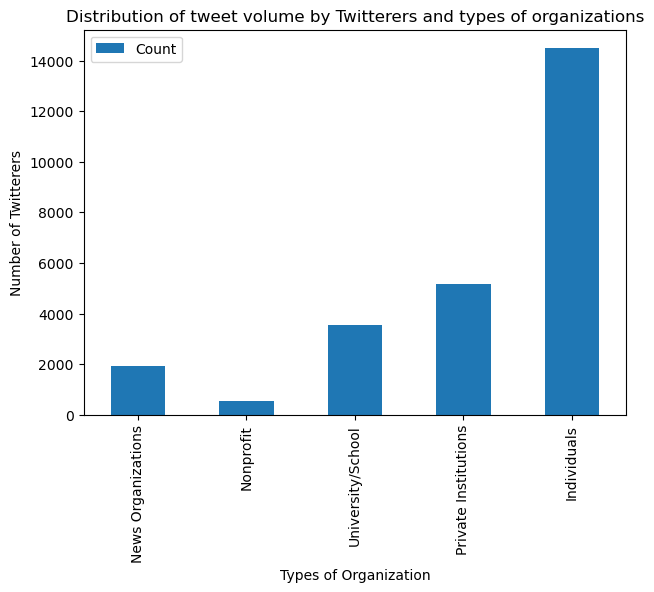

In [38]:
original_tweet_graph = pd.DataFrame({
    'Classification': ['News Organizations', 'Nonprofit', 'University/School','Private Institutions','Individuals'],
    'Count': [news_org_count, nonprofit_count, university_school_count,private_institution_count,individuals_count]
})

ax = original_tweet_graph.plot(x="Classification", y=["Count"], kind="bar",figsize=(7,5), title="Distribution of tweet volume by Twitterers and types of organizations")
ax.set_xlabel("Types of Organization")
ax.set_ylabel("Number of Twitterers")


# Retweet volume distribution of tweet volume by Twitterers and types of organizations

In [17]:
#out of around 1407996 retweeting twitterers, 27299 are selected with those over 10 tweets for most prolific analysis
#out of the 27299 most prolific original twitterers, 31 are news related
#out of the 27299 most prolific original twitterers, 22 are non-profit related
#out of the 27299 most prolific original twitterers, 163 are university or school
#out of the 27299 most prolific original twitterers, 355 are private institutions
#rest were chosen as individuals

tweets_retweet_classification_df = tweets_retweet_pandas_over10.\
withColumn('news_org',
    F.when((F.col("username").contains('news')) \
           | (F.col("user_desc").contains('news'))\
           | (F.col("user_desc").contains('network'))\
                      | (F.col("user_desc").contains('network'))\
           | (F.col("user_desc").contains('publication')),"true")).\
withColumn('nonprofit',
    F.when((F.col("username").contains('nonprofit')) \
           | (F.col("user_desc").contains('nonprofit'))\
           | (F.col("user_desc").contains('non-profit'))\
           | (F.col("user_desc").contains('initative'))
           | (F.col("user_desc").contains('non-partisan'))\
           | (F.col("user_desc").contains('poverty'))\
           | (F.col("user_desc").contains('program'))\
           | (F.col("user_desc").contains('charter')),"true")).\
withColumn('university_school',
    F.when((F.col("username").contains('university')) \
           | (F.col("username").contains('school'))\
           | (F.col("user_desc").contains('university'))\
           | (F.col("user_desc").contains('school'))
           | (F.col("user_desc").contains('uni'))\
           | (F.col("user_desc").contains('college'))\
           | (F.col("user_desc").contains('research')),"true")).\
withColumn('private_institution',
    F.when((F.col("username").contains('.com')) \
           | (F.col("username").contains('group'))\
           | (F.col("user_desc").contains('marketing'))\
           | (F.col("user_desc").contains('finance'))\
           | (F.col("user_desc").contains('ad'))\
           | (F.col("user_desc").contains('job'))\
           | (F.col("user_desc").contains('networking'))\
           | (F.col("user_desc").contains('tutoring'))\
           | (F.col("user_desc").contains('financial'))\
           | (F.col("user_desc").contains('fund'))\
                      | (F.col("user_desc").contains('advertiser'))\
           | (F.col("user_desc").contains('tutor')),"true"))



In [18]:
tweets_retweet_classification_df = tweets_retweet_classification_df.\
withColumn('individuals',
    F.when(F.coalesce("news_org","nonprofit","university_school","private_institution").isNull(),"true").otherwise("false"))
#df = df.withColumn('target', F.when(F.coalesce('column1', 'column2', 'column3').isNull(), 'PASS').otherwise('FAIL'))


In [242]:
tweets_retweet_classification_df_pd = tweets_retweet_classification_df.toPandas()
#final dataframe

In [41]:
news_org_rt_count = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.news_org == 'true').count()
news_org_rt_count

250

In [42]:
nonprofit_rt_count = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.nonprofit == 'true').count()
nonprofit_rt_count

135

In [43]:
university_school_rt_count = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.university_school == 'true').count()
university_school_rt_count

1391

In [44]:
private_institution_rt_count = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.private_institution == 'true').count()
private_institution_rt_count

3575

In [45]:
individuals_rt_count = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.individuals == 'true').count()
individuals_rt_count

22519

Text(0, 0.5, 'Number of Re-Twitterers')

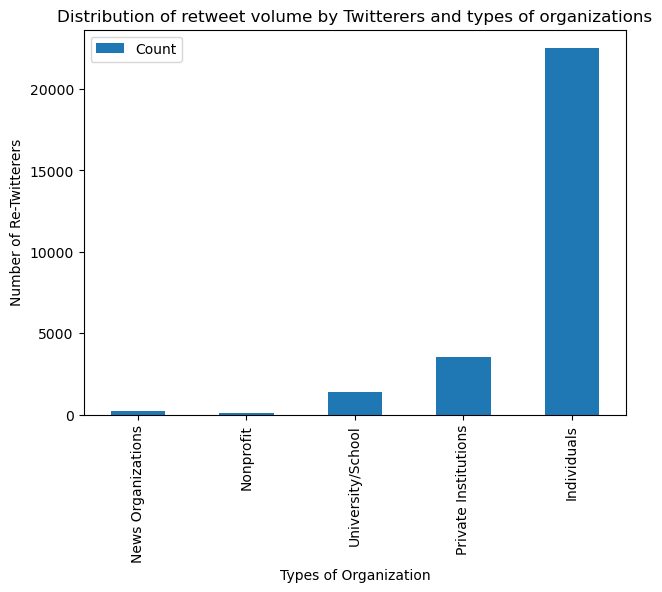

In [46]:
retweet_tweet_graph = pd.DataFrame({
    'Classification': ['News Organizations', 'Nonprofit', 'University/School','Private Institutions','Individuals'],
    'Count': [news_org_rt_count, nonprofit_rt_count, university_school_rt_count,private_institution_rt_count,individuals_rt_count]
})

ax_rt = retweet_tweet_graph.plot(x="Classification", y=["Count"], kind="bar",figsize=(7,5), title="Distribution of retweet volume by Twitterers and types of organizations")
ax_rt.set_xlabel("Types of Organization")
ax_rt.set_ylabel("Number of Re-Twitterers")


# Below analysis is analzying most prolific twitters by type of organization

#### New Organizations - Original

In [19]:
top_news_org = tweets_classification_df.filter(tweets_classification_df.news_org == 'true').sort(F.col("count(text)").desc()).limit(20)

In [21]:
top_news_org.select("username","count(text)")

username,count(text)
Agadir Group,1177
India Education D...,250
AdjunctNation,231
Art Fridrich,213
Myschoolnews,190
EdNews,155
U.S. News Education,155
BPISSUENEWS,155
Academica Top Ten,130
AmeboVillage,129


#### New Organizations - Retweet

In [22]:
top_news_org_rt = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.news_org == 'true').sort(F.col("count(text)").desc()).limit(20)

In [23]:
top_news_org_rt.select("username","count(text)")

username,count(text)
FREE Add Your Ad ...,579
The Indian Express,274
Mulu abraha🥰🎯,122
M'Ideas Limited,117
ZNP,116
sciencenews,114
the Frenchie Mummy,113
NDTV,82
HubOfML,81
Devcod-bot,80


#### Nonprofit - Original

In [24]:
top_nonprofit_org = tweets_classification_df.filter(tweets_classification_df.nonprofit == 'true').sort(F.col("count(text)").desc()).limit(20)

In [25]:
top_nonprofit_org.select("username","count(text)")

username,count(text)
Stigmabase | NORDIC,1043
Stigmabase | NORDIC,256
Education News,209
The Reform Alliance,125
The 74,96
"MIPO, Inc.",90
Diet For Perfect,88
The Center Square,69
IMPRI Impact and ...,63
Stigmabase | ORG,56


#### Nonprofit - Retweet

In [19]:
top_nonprofit_org_rt = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.nonprofit == 'true').sort(F.col("count(text)").desc()).limit(20)

In [20]:
top_nonprofit_org_rt.select("username","count(text)")

username,count(text)
Tarun,203
EdMN PAC,82
Whopcod,79
publiccharters.org,77
Reach4Success,72
Moms for #Educati...,63
Moms for #Educati...,62
Michael S. Oswald 😊,58
MDRC,56
akasatanahama.com,53


#### University/School - Original

In [27]:
top_uni_org = tweets_classification_df.filter(tweets_classification_df.university_school == 'true').sort(F.col("count(text)").desc()).limit(20)

In [28]:
top_uni_org.select("username","count(text)")

username,count(text)
Larry L. Robinson...,2362
Designs By RAJA,1297
Parent Security,808
NorthEastJobs.org.uk,391
School 4 South Af...,350
Careers at Brown,313
Lujain Hamdan7,306
Neurons.AI #intoA...,287
scholarshipsads.com,259
India Education D...,250


#### University/School - Retweet

In [21]:
top_uni_org_rt = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.university_school == 'true').sort(F.col("count(text)").desc()).limit(20)

In [22]:
top_uni_org_rt.select("username","count(text)")

username,count(text)
Educationbnb,2763
James Clark,1764
Richmond Miezah A...,682
Mark Johnson,584
Academic Opportun...,233
Elliot Liber,223
Scholarships and ...,202
Edchat,201
Kulwinder Singh,166
College Esports,120


#### Private Institution - Original

In [ ]:
top_privateinstitution_org = tweets_classification_df.filter(tweets_classification_df.private_institution == 'true').sort(F.col("count(text)").desc()).limit(20)

In [ ]:
top_privateinstitution_org.select("username","count(text)")

username,count(text)
NJSchoolJobs.com,3096
Larry L. Robinson...,2362
KQ education group,1949
InHomeTutoringHon...,1326
Designs By RAJA,1297
Stigmabase | NORDIC,1043
Parent Security,808
poskeos,749
Teaching Jobs,536
Stigmabase | NORDIC,507


#### Private Institution - Retweet

In [ ]:
top_privateinstitution_rt = tweets_retweet_classification_df.filter(tweets_retweet_classification_df.private_institution == 'true').sort(F.col("count(text)").desc()).limit(20)

In [ ]:
top_privateinstitution_rt.select("username","count(text)")

username,count(text)
Educationbnb,2763
Mark Johnson,584
FREE Add Your Ad ...,579
Scalar Humanity,506
InHomeTutoringHon...,419
Najibullah Habibi,283
Engr. Oyinade Ode...,269
መሲ ጋል ራያ ማይጨው❤️,266
Jobicy: Hiring Vo...,251
Academic Opportun...,233


## Below analysis is analzying Influencers, verified twitters, and their highest tweet counts

In [9]:
tweets_spark_influencer = tweets_spark.filter((tweets_spark.verified_user == 'true') & (tweets_spark.followers_count >= 50000))
#influencer is defined as verified user and with followers more than 50,000

In [10]:
tweets_spark_original_influencer = tweets_original.filter((tweets_original.verified_user == 'true') & (tweets_original.followers_count >= 50000))


In [11]:
tweets_spark_retweet_influencer = tweets_retweet.filter((tweets_retweet.verified_user == 'true') & (tweets_retweet.followers_count >= 50000))


In [52]:
tweets_spark_influencer.count()
#28894 are influencers with min of 50000 followers used as follower count out 78624 verified users

28894

The above suggests the number of verified accounts in our dataset.

This graph shows out of the number of verified users population - number of accounts and corresponding number of followers

Text(0.5, 1.0, 'Number of Accounts vs. No of Followers Distribution in Influencer Accounts')

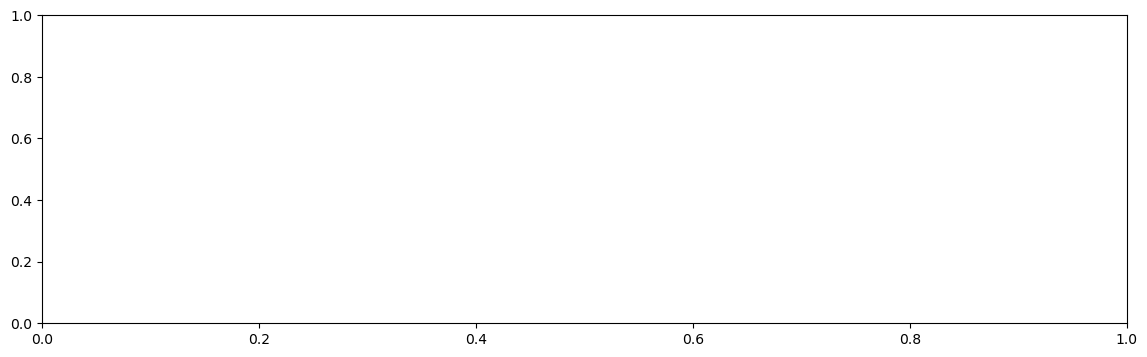

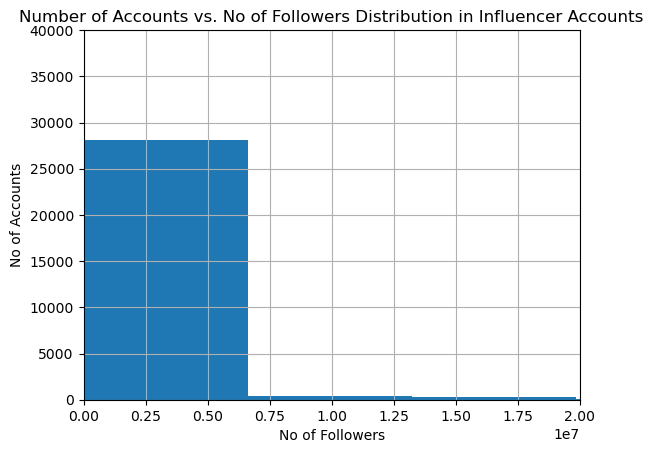

In [32]:
fig, ax = plt.subplots(figsize=(14,4))
tweets_spark_influencer.select('followers_count').toPandas().hist(bins=20)
plt.xlim(0,20000000)
plt.ylim(0,40000)

plt.xlabel('No of Followers')
plt.ylabel('No of Accounts')
plt.title('Number of Accounts vs. No of Followers Distribution in Influencer Accounts')


In [12]:
tweets_spark_original_influencer.groupby('username').agg(count('text')).sort(F.col("count(text)").desc()).limit(15).show(truncate=False)

+-----------------------------------------+-----------+
|username                                 |count(text)|
+-----------------------------------------+-----------+
|U.S. News Education                      |155        |
|Hindustan Times                          |121        |
|Tes                                      |120        |
|Education Week                           |106        |
|Times Higher Education                   |103        |
|The 74                                   |96         |
|Corey A. DeAngelis                       |96         |
|Manila Bulletin News                     |90         |
|EdSurge                                  |81         |
|Global Education Monitoring Report UNESCO|70         |
|JoyNews                                  |69         |
|Fordham Institute                        |68         |
|Global Partnership for Education         |66         |
|Ministry of Education                    |58         |
|CNN Philippines                          |58   

In [49]:
results = tweets_spark_retweet_influencer.groupby('username').agg(count('text')).sort(F.col("count(text)").desc()).limit(15)
results.show(truncate=False)

+---------------------+-----------+
|username             |count(text)|
+---------------------+-----------+
|Corey A. DeAngelis   |450        |
|The Indian Express   |274        |
|NDTV                 |82         |
|Education Cannot Wait|74         |
|Jane Caro            |69         |
|Adam Gorney          |61         |
|Brandon Huffman      |57         |
|Lori Lite            |37         |
|Vala Afshar          |36         |
|Tes                  |35         |
|Michigan.gov         |35         |
|AFT                  |34         |
|Ministry of Education|31         |
|Will Bunch           |30         |
|Nicholas Ferroni     |29         |
+---------------------+-----------+

